# Task 1 -  Iris Flower Classification 

# LetsGrowMore

# By Salman Arif

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
flowers_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names = ["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"])

In [85]:
flowers_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
flowers_data.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
flowers_data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
flowers_data.shape

(150, 5)

In [92]:
flowers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


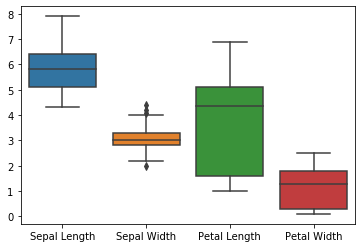

In [35]:
ax = sns.boxplot(data = flowers_data)

<Figure size 576x576 with 0 Axes>

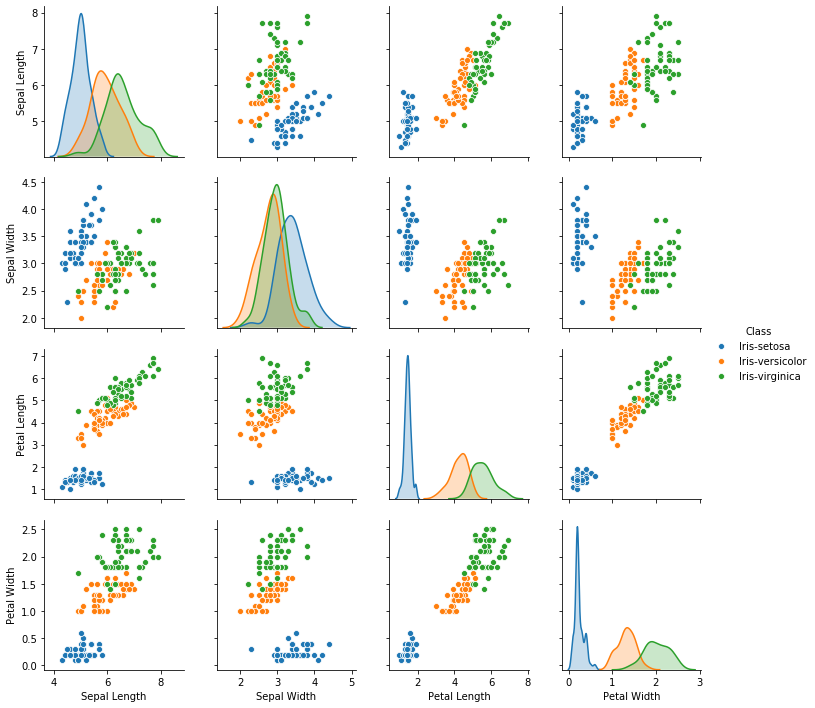

In [91]:
plt.figure(figsize=(8, 8))
ax = sns.pairplot(flowers_data, hue='Class')
plt.show()

In [82]:
# Splitting dataset into train and test 
X = np.asarray(flowers_data[['Sepal Length','Sepal Width','Petal Length','Petal Width']])
Y = np.asarray(flowers_data['Class'])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 30)
print("Training Set: ",X_train.shape,Y_train.shape)
print("Testing Set: ",X_test.shape,Y_test.shape)

Training Set:  (120, 4) (120,)
Testing Set:  (30, 4) (30,)


In [66]:
# Importing the Model KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
pred = model.predict(X_test)


In [67]:
# Evaluation 
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred)*100)
# As it shows that KNN Model is giving 93% percent of accuracy

93.33333333333333


In [69]:
# Now Testing it on manual dataset
New_X = np.array([[3,4,2,5]])
pred_X = knn.predict(New_X)
print("Prediction: ",pred_X)
print("Class: ",flowers_data['Class'][pred_X])

Prediction:  ['Iris-versicolor']
Class:  Iris-versicolor    NaN
Name: Class, dtype: object


In [83]:
#Now importing Logistic regression for comparison
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01,solver='liblinear')
LR.fit(X_train,Y_train)
predLR = LR.predict(X_test)

/home/salman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [88]:
#Calculating Accuracy of LR Model
print(accuracy_score(Y_test,predLR)*100)

70.0


In [79]:
# Now Manually Testing our Model
New_LRX = np.array([[1,2,1.2,0.2]])
pred_LRX = LR.predict(New_LRX)
print("Prediction: ",pred_LRX)
print("Class: ",flowers_data['Class'][pred_LRX])


Prediction:  ['Iris-setosa']
Class:  Iris-setosa    NaN
Name: Class, dtype: object


In [ ]:
#Our KNN Model Performs better as compare to Logistic Regression Model